# Introduction à l'imagerie médicale

## Exercice1: 

L'objectif de cet exercice est de comparer une image classique au format "jpg" et contenant des données médicales à une image du même sujet mais sauvegardée sous le format médical DICOM. L'image DICOM de cet exercice provient du site https://www.cancerimagingarchive.net/

1) En utilisant la librairie opencv, lisez l'image "brain_067.jpg" et affichez les valeurs des intensités contenues dans l'image. 

In [106]:
import cv2 
import numpy as np
img = cv2.imread("brain_067.jpg",0)

In [107]:
cv2.imshow('image',img)

In [108]:
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


2) A l'aide de la librairie matplotlib, affichez les intensités de gris de l'image.

In [109]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

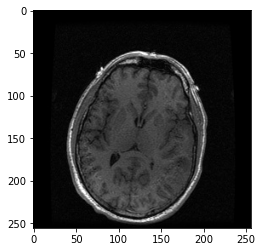

In [110]:
my_image = PIL.Image.open("brain_067.jpg")
grayscale_image = my_image.convert("L")
grayscale_array = np.asarray(grayscale_image)
plt.imshow(grayscale_array, cmap="gray")


3) Affichez sa taille en pixels ainsi que sa valeur maximale.

In [111]:
print(grayscale_array.shape)

(256, 256)


In [112]:
print(np.amax(grayscale_array))

255


4) Affichez la taille en mémoire de l'image à l'aide de la librairie os.

In [113]:
import os
print (os.stat("brain_067.jpg").st_size)

19844


5) Importez la librairie pydicom, lisez le fichier "brain_067.dcm" et affichez son contenu.

In [114]:
from pydicom import dcmread
img_2 = dcmread("brain_067.dcm")

6) Affichez sa taille en mémoire à l'aide de la librairie os.

In [115]:
import os
print (os.stat("brain_067.dcm").st_size)

133380


7) Affichez le contenu de l'image.

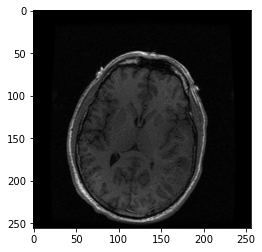

In [116]:
plt.imshow(img_2.pixel_array, cmap=plt.cm.gray)
plt.show()


8) Affichez la valeur maximale des niveaux de gris de l'image

In [117]:
grayscale_array_2 = np.asarray(img_2)
print(np.amax(grayscale_array_2))

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.1706.4001.303991077508412432463357302508
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.27'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.1706.4001.303991077508412432463357302508
(0008, 0020) Study Date         

9) Comparez ce que vous avez obtenu pour le fichier .jpg ainsi que le fichier .dcm et expliquez.

In [120]:
### Pour l'image .jpg j'ai obtenu le maximum de valeur de pixel ainsi que pour l'image .dcm j'ai obtenu de la metadata ###

10) En utilisant la librairie matplotlib, affichez les deux images .jpg et .dcm dans une même fenêtre avec les noms suivants pour chaque image (brain_jpg, brain_dcm)

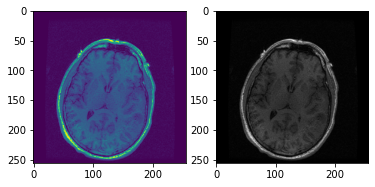

In [121]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_2.pixel_array, cmap=plt.cm.gray)

## Exercice2: 

L'objectif de cet exercice est d'apprendre à manipuler un volume de données DICOM et le visualiser.

1) Affichez le contenu des champs PatientName, PatientID, Modality, StudyDate de l'image DICOM préalablement chargée.

In [122]:
print('PatientName :', img_2.PatientName,' ;PatientID: ',img_2.PatientID,' ;Modality: ',img_2.Modality,' ;StudyDate: ',img_2.StudyDate)

PatientName :    ;PatientID:  TCGA-02-0003  ;Modality:  MR  ;StudyDate:  19970608


2) Modifiez le nom du patient et mettez comme nouveau nom "anonymous"

In [123]:
img_2.PatientName = 'anonymous'
print(img_2.PatientName)

anonymous


3) Sauvegardez l'image DICOM sous le nouveau nom "brain_067_anonymous.dcm". L'objectif de ces deux opérations est d'anonymiser les noms des individus puisque les noms des patients doivent rester inconnus. Dans le cadre de ce notebook, la donnée de départ est déjà anonymisée mais au cas où vous travaillez avec un médecin et vous récupérez des données, vous devez absolument anonymiser vos données et remplacer les noms des individus par des identifiants.

In [124]:
img_2.save_as("brain_067_anonymous.dcm")

4) Les données DICOM se présentent généralement sous forme d'un ensemble de coupes 2D constituant un volume global 3D. Le répertoire DICOM_3D_volume contient un exemple d'ensemble de coupes 2D d'un cerveau humain. Stockez les noms de tous les fichiers contenus dans le répertoire DICOM_3D_volume dans une liste que vous appellerez list_filenames.

In [125]:
import os
list_filenames = os.listdir('./Données-20200925/DICOM_3D_volume/DICOM_3D_volume')
list_filenames

['1-001.dcm',
 '1-002.dcm',
 '1-003.dcm',
 '1-004.dcm',
 '1-005.dcm',
 '1-006.dcm',
 '1-007.dcm',
 '1-008.dcm',
 '1-009.dcm',
 '1-010.dcm',
 '1-011.dcm',
 '1-012.dcm',
 '1-013.dcm',
 '1-014.dcm',
 '1-015.dcm',
 '1-016.dcm',
 '1-017.dcm',
 '1-018.dcm',
 '1-019.dcm',
 '1-020.dcm',
 '1-021.dcm',
 '1-022.dcm',
 '1-023.dcm',
 '1-024.dcm',
 '1-025.dcm',
 '1-026.dcm',
 '1-027.dcm',
 '1-028.dcm',
 '1-029.dcm',
 '1-030.dcm',
 '1-031.dcm',
 '1-032.dcm',
 '1-033.dcm',
 '1-034.dcm',
 '1-035.dcm',
 '1-036.dcm',
 '1-037.dcm',
 '1-038.dcm',
 '1-039.dcm',
 '1-040.dcm',
 '1-041.dcm',
 '1-042.dcm',
 '1-043.dcm',
 '1-044.dcm',
 '1-045.dcm',
 '1-046.dcm',
 '1-047.dcm',
 '1-048.dcm',
 '1-049.dcm',
 '1-050.dcm',
 '1-051.dcm',
 '1-052.dcm',
 '1-053.dcm',
 '1-054.dcm',
 '1-055.dcm',
 '1-056.dcm',
 '1-057.dcm',
 '1-058.dcm',
 '1-059.dcm',
 '1-060.dcm',
 '1-061.dcm',
 '1-062.dcm',
 '1-063.dcm',
 '1-064.dcm',
 '1-065.dcm',
 '1-066.dcm',
 '1-067.dcm',
 '1-068.dcm',
 '1-069.dcm',
 '1-070.dcm',
 '1-071.dcm',
 '1-07

In [138]:
import pydicom
import numpy as np

5) En utilisant les lignes de code suivantes, créez un volume de données 3D regroupant toutes les coupes.

In [140]:
# Get a reference file
reference_dataset = pydicom.dcmread('./Données-20200925/DICOM_3D_volume/DICOM_3D_volume/' +list_filenames[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(reference_dataset.Rows), int(reference_dataset.Columns), len(list_filenames))

# Load spacing values (in mm)
ConstPixelSpacing = (float(reference_dataset.PixelSpacing[0]), \
                     float(reference_dataset.PixelSpacing[1]), \
                     float(reference_dataset.SliceThickness))

print("volume dimensions : ", ConstPixelDims)
print("volume pixel spacing : ", ConstPixelSpacing)


# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=reference_dataset.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in list_filenames:
    # read the file
    ds = pydicom.dcmread('./Données-20200925/DICOM_3D_volume/DICOM_3D_volume/' + filenameDCM)
    # store the raw image data/
    ArrayDicom[:, :, list_filenames.index(filenameDCM)] = ds.pixel_array

volume dimensions :  (256, 256, 124)
volume pixel spacing :  (1.015625, 1.015625, 1.2)


6) Ecrivez la fonction explore_3dimage_axial qui permet d'afficher le volume 3D en parcourant les coupes selon la direction z (vue axiale).

7) Ecrivez les fonctions explore_3dimage_coronal et explore_3dimage_sagittal qui permettent de représenter le volume 3D respectiviement en vue coronale et sagittale et appliquez les au volume de données précédent. 

## Exercice3: 


L'objectif de cet exercice est de vous familiariser avec le format nifti qui est une référence en neuroimagerie puisqu'il est plus léger que le format dicom et permet en même temps de garder des informations utiles sur l'acquisition pour les traiteurs d'images à travers son en-tête.

1) A l'aide de la librairie dicom2nifti, convertissez l'ensemble des coupes 2D contenues dans le dossier DICOM_3D_volume au format nifti.

In [148]:
import dicom2nifti
dicom2nifti.convert_directory('./Données-20200925/DICOM_3D_volume/DICOM_3D_volume/', './', compression=True, reorient=True)

2) A l'aide de la librairie nibabel, lisez le fichier "nifti_volume.nii"

In [153]:
import nibabel as nib
img_nii = nib.load('./7_3d_volume.nii.gz')

3) Affichez les données de ce nouveau volume.

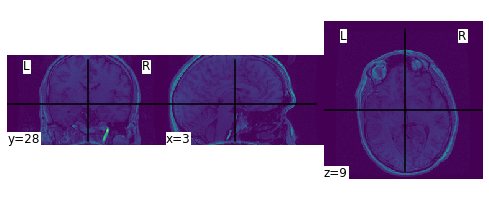

In [154]:
from nilearn import plotting
plotting.plot_img(img_nii)

4) Uilisez la fonction explore_3dimage_axial que vous avez codée dans l'exercice précédent pour affichez le nouveau volume en vue axiale: